In [60]:
import numpy as ns
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [61]:
df=pd.read_csv("D:/Placement/data science/PHASE_1/netflix_titles.csv")
df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."


In [62]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [64]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

#Prepare dataset for analysis

In [65]:
df["show_id"].str.split("s").str[1]

0          1
1          2
2          3
3          4
4          5
        ... 
8802    8803
8803    8804
8804    8805
8805    8806
8806    8807
Name: show_id, Length: 8807, dtype: object

In [66]:
df["show_id"]=df["show_id"].str.split("s").str[1]
df.head(1)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."


In [67]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [68]:
df["type"].isnull().sum()

np.int64(0)

In [69]:
df["title"].isnull().sum()

np.int64(0)

In [70]:
df["director"].isnull().sum()

np.int64(2634)

In [71]:
df["director"]=df["director"].fillna("Unknown")
df["director"]=df["director"].str.strip()
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,4,TV Show,Jailbirds New Orleans,Unknown,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [72]:
df["cast"]=df["cast"].fillna("Unknown")
df["cast"]=df["cast"].str.strip()
df.head(1)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."


In [73]:
df["country"]=df["country"].fillna("Unknown")
df["country"]=df["country"].str.strip()
df.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
8802,8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,8804,TV Show,Zombie Dumb,Unknown,Unknown,Unknown,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
8806,8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...


In [74]:
df["date_added"] = df["date_added"].astype(str).str.strip()
df["date_added"] = pd.to_datetime(df["date_added"], errors="coerce")
df["date_added_formatted"] = df["date_added"].dt.strftime("%d/%m/%y")
df.head(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,date_added_formatted
0,1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",25/09/21
1,2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",24/09/21
2,3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,24/09/21
3,4,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",24/09/21
4,5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,24/09/21
5,6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",Unknown,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...,24/09/21
6,7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",Unknown,2021-09-24,2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,24/09/21
7,8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",24/09/21
8,9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,2021-09-24,2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...,24/09/21
9,10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,2021-09-24,2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...,24/09/21


In [75]:
df.drop("date_added",axis=1,inplace=True)
df.head(1)

,show_id,type,title,director,cast,country,release_year,rating,duration,listed_in,description,date_added_formatted
0,1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",25/09/21


In [76]:
df.tail(20)

,show_id,type,title,director,cast,country,release_year,rating,duration,listed_in,description,date_added_formatted
8787,8788,Movie,You Can’t Fight Christmas,Kenny Young,"Brely Evans, Andra Fuller, Persia White, Porsc...",United States,2017,TV-PG,85 min,"Comedies, Romantic Movies",After stepping in to revitalize his family's h...,19/12/17
8788,8789,Movie,You Carry Me,Ivona Juka,"Lana Baric, Vojislav Brajovic, Natasa Janjic, ...","Croatia, Slovenia, Serbia, Montenegro",2015,TV-MA,157 min,"Dramas, International Movies","A soap opera producer, director and makeup art...",01/07/16
8789,8790,Movie,You Changed My Life,Cathy Garcia-Molina,"John Lloyd Cruz, Sarah Geronimo, Rayver Cruz, ...",Philippines,2009,TV-PG,116 min,"Comedies, Dramas, International Movies",Laida and Miggy think they've found perfect ha...,27/02/19
8790,8791,Movie,You Don't Mess with the Zohan,Dennis Dugan,"Adam Sandler, John Turturro, Emmanuelle Chriqu...",United States,2008,UR,113 min,"Action & Adventure, Comedies",An Israeli counterterrorism soldier with a sec...,01/09/19
8791,8792,Movie,Young Adult,Jason Reitman,"Charlize Theron, Patton Oswalt, Patrick Wilson...",United States,2011,R,94 min,"Comedies, Dramas, Independent Movies",When a divorced writer gets a letter from an o...,20/11/19
8792,8793,Movie,Young Tiger,Mu Chu,"Qiu Yuen, Charlie Chin, Jackie Chan, Hu Chin, ...",Hong Kong,1973,NR,81 min,"Action & Adventure, International Movies","Aided only by a tough female police officer, a...",01/11/16
8793,8794,Movie,"Yours, Mine and Ours",Raja Gosnell,"Dennis Quaid, Rene Russo, Sean Faris, Katija P...",United States,2005,PG,88 min,"Children & Family Movies, Comedies",When a father of eight and a mother of 10 prep...,20/11/19
8794,8795,Movie,اشتباك,Mohamed Diab,"Nelly Karim, Hany Adel, Tarek Abdel Aziz, Ahme...","Egypt, France",2016,TV-14,98 min,"Dramas, Independent Movies, International Movies",Amid the tumult following Egyptian President M...,11/10/18
8795,8796,TV Show,Yu-Gi-Oh! Arc-V,Unknown,"Mike Liscio, Emily Bauer, Billy Bob Thompson, ...","Japan, Canada",2015,TV-Y7,2 Seasons,"Anime Series, Kids' TV",Now that he's discovered the Pendulum Summonin...,01/05/18
8796,8797,TV Show,Yunus Emre,Unknown,"Gökhan Atalay, Payidar Tüfekçioglu, Baran Akbu...",Turkey,2016,TV-PG,2 Seasons,"International TV Shows, TV Dramas","During the Mongol invasions, Yunus Emre leaves...",17/01/17


In [77]:
df["date_added_formatted"]=df["date_added_formatted"].fillna("Unknown")
df

,show_id,type,title,director,cast,country,release_year,rating,duration,listed_in,description,date_added_formatted
0,1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",25/09/21
1,2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",24/09/21
2,3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,24/09/21
3,4,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",24/09/21
4,5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,24/09/21
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",20/11/19
8803,8804,TV Show,Zombie Dumb,Unknown,Unknown,Unknown,2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g...",01/07/19
8804,8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,01/11/19
8805,8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",11/01/20


In [78]:
df.isnull().sum()

show_id                 0
type                    0
title                   0
director                0
cast                    0
country                 0
release_year            0
rating                  4
duration                3
listed_in               0
description             0
date_added_formatted    0
dtype: int64

In [79]:
df["rating"].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', '74 min', '84 min', '66 min', 'NR', nan,
       'TV-Y7-FV', 'UR'], dtype=object)

In [80]:
def simplify_rating(rating):
    if pd.isna(rating):
        return "Unknown"
    elif rating.startswith(("TV-MA",'TV-14','TV-PG','TV-Y','TV-Y7',"TV-G","TV-Y7-FV")):
        return "TV"
    elif rating.startswith(("PG-13","PG","G","UR")):
        return "Family"
    elif rating.startswith(("R",'NC-17','NR')):
        return "Adult"
    else:
        return "Unknown"

df["rating_simplified"] = df["rating"].apply(simplify_rating)

df[["rating", "rating_simplified"]].head(10)


,rating,rating_simplified
0,PG-13,Family
1,TV-MA,TV
2,TV-MA,TV
3,TV-MA,TV
4,TV-MA,TV
5,TV-MA,TV
6,PG,Family
7,TV-MA,TV
8,TV-14,TV
9,PG-13,Family


In [81]:
df.drop("rating",axis=1,inplace=True)
df

,show_id,type,title,director,cast,country,release_year,duration,listed_in,description,date_added_formatted,rating_simplified
0,1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2020,90 min,Documentaries,"As her father nears the end of his life, filmm...",25/09/21,Family
1,2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",24/09/21,TV
2,3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,24/09/21,TV
3,4,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,2021,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",24/09/21,TV
4,5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,24/09/21,TV
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2007,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",20/11/19,Adult
8803,8804,TV Show,Zombie Dumb,Unknown,Unknown,Unknown,2018,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g...",01/07/19,TV
8804,8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2009,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,01/11/19,Adult
8805,8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2006,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",11/01/20,Family


In [82]:
df["duration"].unique()

array(['90 min', '2 Seasons', '1 Season', '91 min', '125 min',
       '9 Seasons', '104 min', '127 min', '4 Seasons', '67 min', '94 min',
       '5 Seasons', '161 min', '61 min', '166 min', '147 min', '103 min',
       '97 min', '106 min', '111 min', '3 Seasons', '110 min', '105 min',
       '96 min', '124 min', '116 min', '98 min', '23 min', '115 min',
       '122 min', '99 min', '88 min', '100 min', '6 Seasons', '102 min',
       '93 min', '95 min', '85 min', '83 min', '113 min', '13 min',
       '182 min', '48 min', '145 min', '87 min', '92 min', '80 min',
       '117 min', '128 min', '119 min', '143 min', '114 min', '118 min',
       '108 min', '63 min', '121 min', '142 min', '154 min', '120 min',
       '82 min', '109 min', '101 min', '86 min', '229 min', '76 min',
       '89 min', '156 min', '112 min', '107 min', '129 min', '135 min',
       '136 min', '165 min', '150 min', '133 min', '70 min', '84 min',
       '140 min', '78 min', '7 Seasons', '64 min', '59 min', '139 min',
    

In [83]:
# Convert all durations to minutes
def convert_to_min(duration):
    try:
        duration = duration.split(" ")
        if duration[1] == "min":
            return int(duration[0])
        elif duration[1] in ["Season", "Seasons"]:
            return int(duration[0]) * 10 * 45  # 10 episodes × 45 min per episode
        else:
            return 0
    except:
        return 0  # handles missing or malformed durations

# print(convert_to_min("179 min"))
# print(convert_to_min('2 Seasons'))
df["simplify_duration"] = df["duration"].apply(convert_to_min)
df[["duration","simplify_duration"]].head(10)

,duration,simplify_duration
0,90 min,90
1,2 Seasons,900
2,1 Season,450
3,1 Season,450
4,2 Seasons,900
5,1 Season,450
6,91 min,91
7,125 min,125
8,9 Seasons,4050
9,104 min,104


In [84]:
df.drop("duration",axis=1,inplace=True)
df.head(2)

,show_id,type,title,director,cast,country,release_year,listed_in,description,date_added_formatted,rating_simplified,simplify_duration
0,1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2020,Documentaries,"As her father nears the end of his life, filmm...",25/09/21,Family,90
1,2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",24/09/21,TV,900


In [85]:
df["listed_in"].unique()

array(['Documentaries', 'International TV Shows, TV Dramas, TV Mysteries',
       'Crime TV Shows, International TV Shows, TV Action & Adventure',
       'Docuseries, Reality TV',
       'International TV Shows, Romantic TV Shows, TV Comedies',
       'TV Dramas, TV Horror, TV Mysteries', 'Children & Family Movies',
       'Dramas, Independent Movies, International Movies',
       'British TV Shows, Reality TV', 'Comedies, Dramas',
       'Crime TV Shows, Docuseries, International TV Shows',
       'Dramas, International Movies',
       'Children & Family Movies, Comedies',
       'British TV Shows, Crime TV Shows, Docuseries',
       'TV Comedies, TV Dramas', 'Documentaries, International Movies',
       'Crime TV Shows, Spanish-Language TV Shows, TV Dramas',
       'Thrillers',
       'International TV Shows, Spanish-Language TV Shows, TV Action & Adventure',
       'International TV Shows, TV Action & Adventure, TV Dramas',
       'Comedies, International Movies',
       'Comedies, 

In [86]:
df["description"].unique()

array(['As her father nears the end of his life, filmmaker Kirsten Johnson stages his death in inventive and comical ways to help them both face the inevitable.',
       'After crossing paths at a party, a Cape Town teen sets out to prove whether a private-school swimming star is her sister who was abducted at birth.',
       'To protect his family from a powerful drug lord, skilled thief Mehdi and his expert team of robbers are pulled into a violent and deadly turf war.',
       ...,
       'Looking to survive in a world taken over by zombies, a dorky college student teams with an urban roughneck and a pair of grifter sisters.',
       'Dragged from civilian life, a former superhero must train a new crop of youthful saviors when the military preps for an attack by a familiar villain.',
       "A scrappy but poor boy worms his way into a tycoon's dysfunctional family, while facing his fear of music and the truth about his past."],
      shape=(8775,), dtype=object)

In [87]:
df["description"].isnull().sum()

np.int64(0)

# Analysis report

In [88]:
df.head()

,show_id,type,title,director,cast,country,release_year,listed_in,description,date_added_formatted,rating_simplified,simplify_duration
0,1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2020,Documentaries,"As her father nears the end of his life, filmm...",25/09/21,Family,90
1,2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",24/09/21,TV,900
2,3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,24/09/21,TV,450
3,4,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,2021,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",24/09/21,TV,450
4,5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,24/09/21,TV,900


In [89]:
df.isnull().sum()

show_id                 0
type                    0
title                   0
director                0
cast                    0
country                 0
release_year            0
listed_in               0
description             0
date_added_formatted    0
rating_simplified       0
simplify_duration       0
dtype: int64

In [90]:
df.describe()

,release_year,simplify_duration
count,8807.000000,8807.000000
mean,2014.180198,310.611900
std,8.819312,506.707453
min,1925.000000,0.000000
25%,2013.000000,92.000000
50%,2017.000000,111.000000
75%,2019.000000,450.000000
max,2021.000000,7650.000000


In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   show_id               8807 non-null   object
 1   type                  8807 non-null   object
 2   title                 8807 non-null   object
 3   director              8807 non-null   object
 4   cast                  8807 non-null   object
 5   country               8807 non-null   object
 6   release_year          8807 non-null   int64 
 7   listed_in             8807 non-null   object
 8   description           8807 non-null   object
 9   date_added_formatted  8807 non-null   object
 10  rating_simplified     8807 non-null   object
 11  simplify_duration     8807 non-null   int64 
dtypes: int64(2), object(10)
memory usage: 825.8+ KB


# Analyze categorical columns

In [92]:
#count of movies vs tv shows
df["type"].value_counts()

type
Movie      6131
TV Show    2676
Name: count, dtype: int64

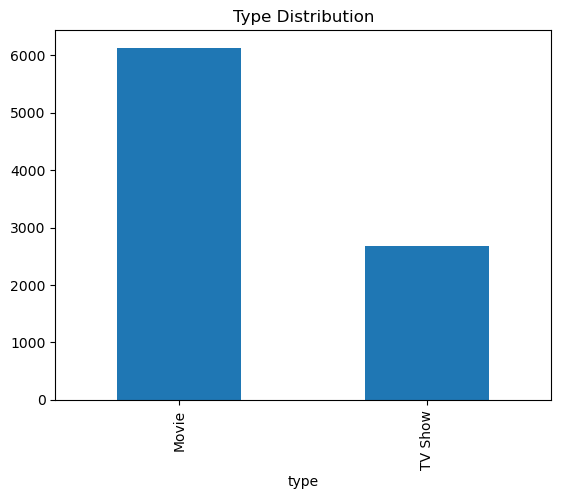

In [93]:
df["type"].value_counts().plot(kind="bar", title="Type Distribution")
plt.show()

In [94]:
#simplified rating
df["rating_simplified"].value_counts()

rating_simplified
TV         7097
Adult       882
Family      821
Unknown       7
Name: count, dtype: int64

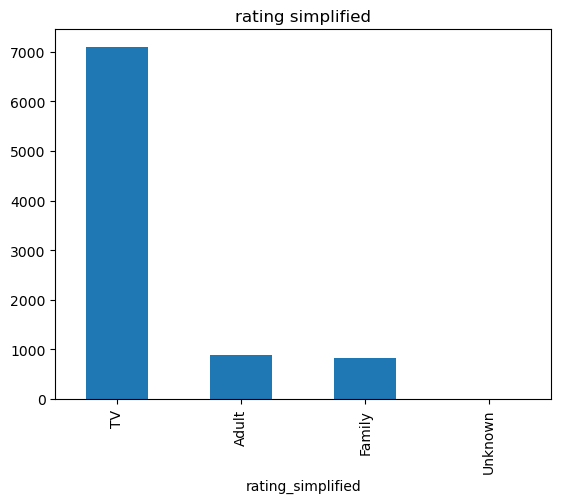

In [95]:
df["rating_simplified"].value_counts().plot(kind="bar", title="rating simplified")
plt.show()

In [96]:
# Top 10 countries producing Netflix content
df["country"].value_counts().head(10)

country
United States     2818
India              972
Unknown            831
United Kingdom     419
Japan              245
South Korea        199
Canada             181
Spain              145
France             124
Mexico             110
Name: count, dtype: int64

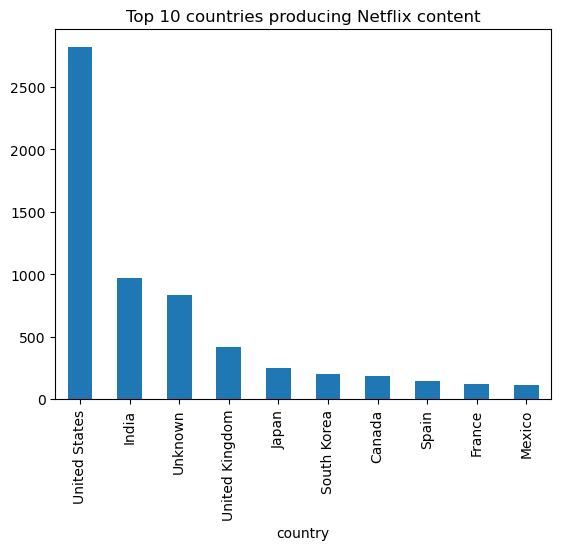

In [97]:
#visualize
df["country"].value_counts().head(10).plot(kind="bar", title="Top 10 countries producing Netflix content")
plt.show()

In [98]:
# Top 10 directors by number of titles
df["director"].value_counts().head(10)

director
Unknown                   2634
Rajiv Chilaka               19
Raúl Campos, Jan Suter      18
Suhas Kadav                 16
Marcus Raboy                16
Jay Karas                   14
Cathy Garcia-Molina         13
Martin Scorsese             12
Youssef Chahine             12
Jay Chapman                 12
Name: count, dtype: int64

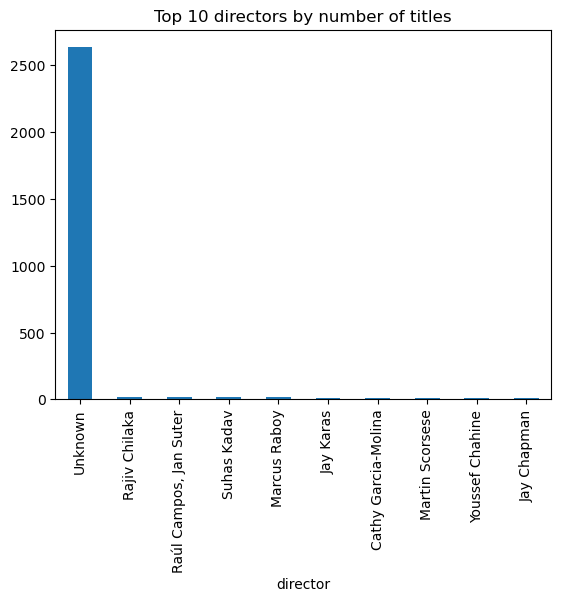

In [99]:
#visualize
df["director"].value_counts().head(10).plot(kind="bar", title="Top 10 directors by number of titles")
plt.show()

# Analyze numeric columns

In [100]:
df["simplify_duration"].describe()

count    8807.000000
mean      310.611900
std       506.707453
min         0.000000
25%        92.000000
50%       111.000000
75%       450.000000
max      7650.000000
Name: simplify_duration, dtype: float64

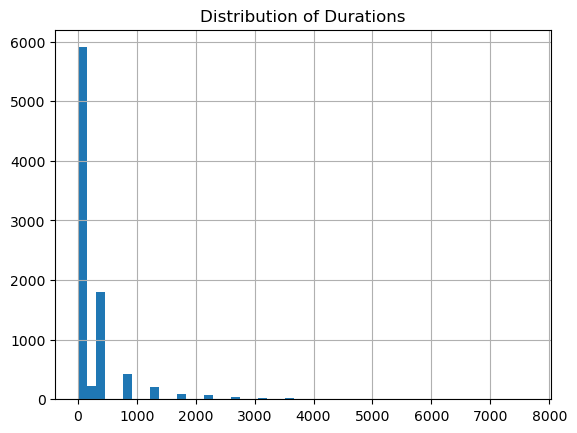

In [101]:
df["simplify_duration"].hist(bins=50)
plt.title("Distribution of Durations")
plt.show()

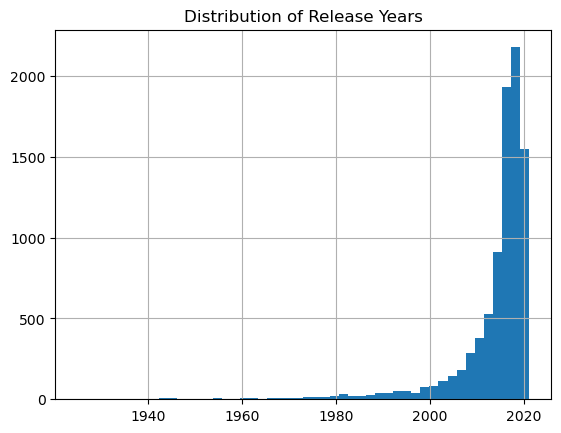

In [102]:
df["release_year"].hist(bins=50)
plt.title("Distribution of Release Years")
plt.show()

In [103]:
# find outliars

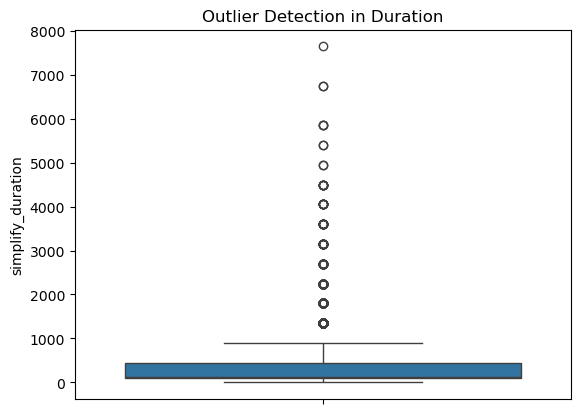

In [104]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(y=df["simplify_duration"])
plt.title("Outlier Detection in Duration")
plt.show()

In [105]:
# Step 1: Calculate IQR (Interquartile Range)
Q1 = df["simplify_duration"].quantile(0.25)
Q3 = df["simplify_duration"].quantile(0.75)
IQR = Q3 - Q1

# Step 2: Define limits
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

# Step 3: Remove outliers
df = df[(df["simplify_duration"] >= lower_limit) & (df["simplify_duration"] <= upper_limit)]

# Step 4: Confirm cleaning
print("✅ Outliers removed successfully")
print("Remaining rows:", df.shape[0])


✅ Outliers removed successfully
Remaining rows: 8349


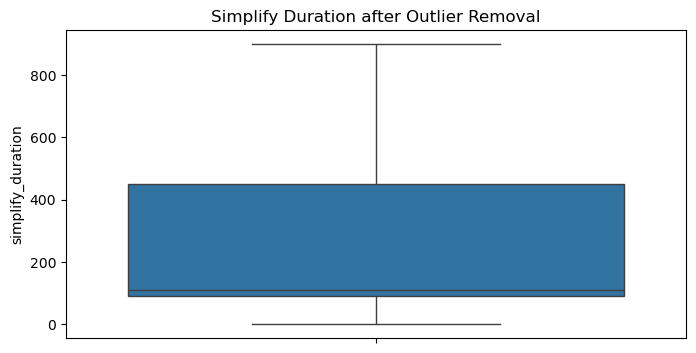

In [106]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,4))
sns.boxplot(df["simplify_duration"])
plt.title("Simplify Duration after Outlier Removal")
plt.show()


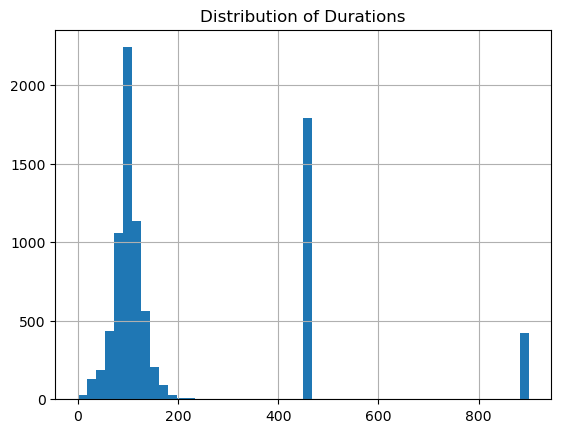

In [108]:
df["simplify_duration"].hist(bins=50)
plt.title("Distribution of Durations")
plt.show()

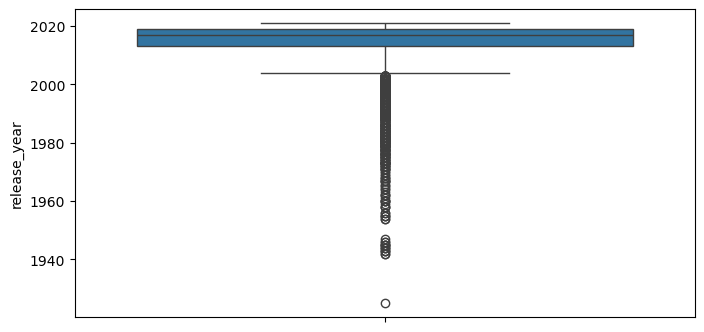

In [110]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,4))
sns.boxplot(df["release_year"])
plt.show()


In [111]:
# Step 1: Calculate IQR (Interquartile Range)
Q1 = df["release_year"].quantile(0.25)
Q3 = df["release_year"].quantile(0.75)
IQR = Q3 - Q1

# Step 2: Define limits
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

# Step 3: Remove outliers
df = df[(df["release_year"] >= lower_limit) & (df["release_year"] <= upper_limit)]

# Step 4: Confirm cleaning
print("✅ Outliers removed successfully")
print("Remaining rows:", df.shape[0])


✅ Outliers removed successfully
Remaining rows: 7656


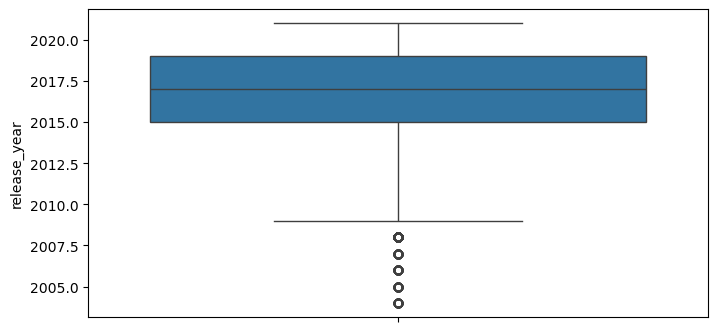

In [112]:
# The release_year column doesn’t usually have true outliers — it’s just the year the movie/show was released (e.g., between 1925–2021).

# So a boxplot might show a few “outlier” dots, 
# but they’re not errors — they’re older movies or newer releases.
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,4))
sns.boxplot(df["release_year"])
plt.show()


In [113]:
#check duplicate
df.duplicated().sum()

np.int64(0)

In [114]:
df.dtypes

show_id                 object
type                    object
title                   object
director                object
cast                    object
country                 object
release_year             int64
listed_in               object
description             object
date_added_formatted    object
rating_simplified       object
simplify_duration        int64
dtype: object

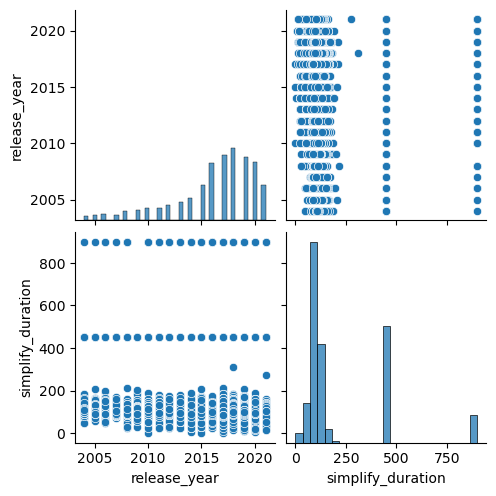

In [115]:
sns.pairplot(df)

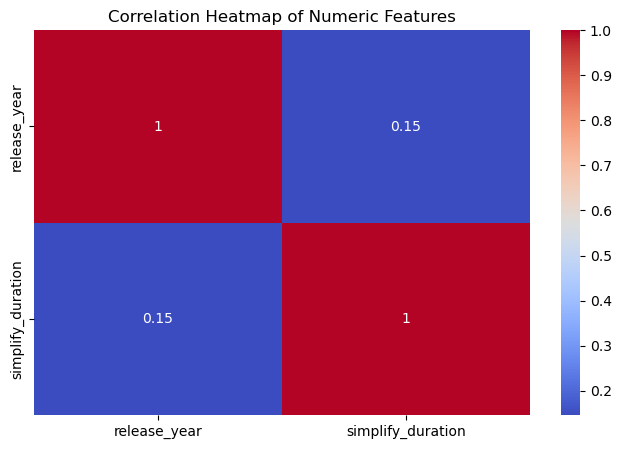

In [121]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap of Numeric Features")
plt.show()


In [ ]:
# 1 → Usually the maximum value in the scale (often means perfect correlation if it’s a correlation matrix).

# 0.5 → Mid value; medium intensity in the color scale.

# 0 → Minimum value (least intensity, often no correlation).

# The color gradient visually shows high vs low values. For example:

# Dark red → high value (close to 1)

# Light color → low value (close to 0)